<a href="https://colab.research.google.com/github/Sri-Pooja00/2203A51341_NLP/blob/main/2203A51341_03_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']

# Get word vectors for each word
word_vectors = {word: model[word] for word in words}

# Print out the vectors
for word, vector in word_vectors.items():
    print(f"{word}: {vector[:10]}...")  # Print first 10 dimensions for brevity

# Check similarity
similarity = model.similarity('king', 'queen')
print(f"Similarity between 'king' and 'queen': {similarity}")

# Perform analogy
result = model.most_similar(positive=['king', 'woman'], negative=['man'])
print("Result of analogy (king - man + woman):", result)


[==================================================] 100.0% 1662.8/1662.8MB downloaded
king: [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]...
queen: [ 0.00524902 -0.14355469 -0.06933594  0.12353516  0.13183594 -0.08886719
 -0.07128906 -0.21679688 -0.19726562  0.05566406]...
man: [ 0.32617188  0.13085938  0.03466797 -0.08300781  0.08984375 -0.04125977
 -0.19824219  0.00689697  0.14355469  0.0019455 ]...
woman: [ 0.24316406 -0.07714844 -0.10302734 -0.10742188  0.11816406 -0.10742188
 -0.11425781  0.02563477  0.11181641  0.04858398]...
paris: [-0.35546875  0.04614258  0.08056641  0.4375      0.01049805  0.21875
 -0.15136719 -0.109375   -0.22851562  0.05761719]...
france: [-0.20605469 -0.16699219  0.19238281  0.24902344  0.11767578  0.06298828
 -0.30273438 -0.33984375 -0.14355469  0.00115204]...
london: [-0.4609375   0.0279541  -0.26757812  0.41015625 -0.07666016  0.1015625
 -0.328125   -0.234375   -0.09570312  0.

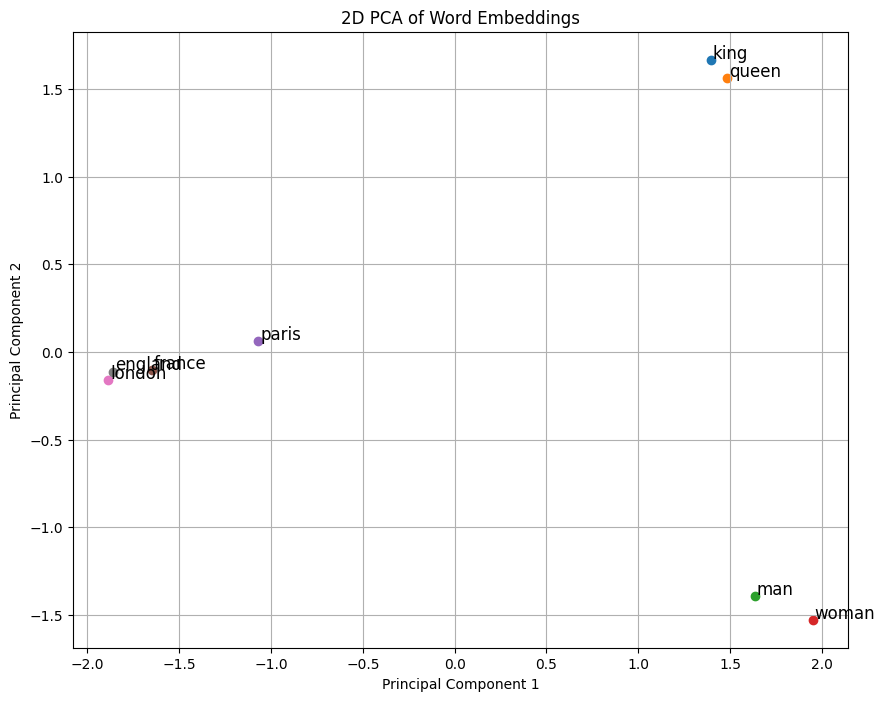

king: [1.39518228 1.66730622]
queen: [1.48378954 1.56190925]
man: [ 1.63368114 -1.39132186]
woman: [ 1.94959746 -1.52802441]
paris: [-1.06844631  0.06223533]
france: [-1.64749859 -0.10154307]
london: [-1.88732084 -0.15886128]
england: [-1.85898469 -0.11170018]


In [ ]:
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']

# Get word vectors for each word
word_vectors = [model[word] for word in words]

from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization or analysis
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for i, word in enumerate(words):
    plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1])
    plt.text(word_vectors_pca[i, 0] + 0.01, word_vectors_pca[i, 1] + 0.01, word, fontsize=12)

plt.title('2D PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

for word, vector in zip(words, word_vectors_pca):
    print(f"{word}: {vector}")


In [ ]:
import spacy

# Load the small English model
nlp = spacy.load('en_core_web_sm')

# The sentence to parse
text = "The quick brown fox jumps over the lazy dog."

# Parse the sentence
doc = nlp(text)

# Print the dependency parsing information
for token in doc:
    print(f"{token.text:10} {token.dep_:10} {token.head.text:10} {token.head.pos_:10}")



The        det        fox        NOUN      
quick      amod       fox        NOUN      
brown      amod       fox        NOUN      
fox        nsubj      jumps      VERB      
jumps      ROOT       jumps      VERB      
over       prep       jumps      VERB      
the        det        dog        NOUN      
lazy       amod       dog        NOUN      
dog        pobj       over       ADP       
.          punct      jumps      VERB      
